**Step 1)**
load the colored image

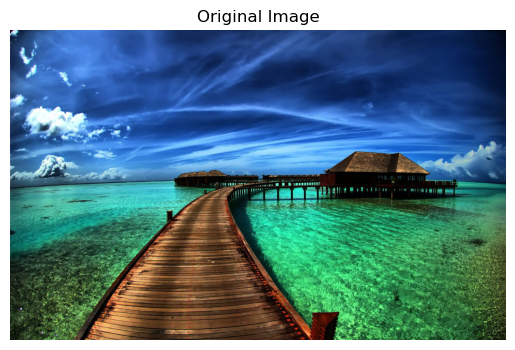

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float

# Load the image
image = io.imread('Bhpd8.jpg')
image = img_as_float(image)  # Convert image to float

# Display the original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

**step 2)**
Perform SVD on each color channel

In [4]:
def svd_decompose(image_channel):
    U, S, Vt = np.linalg.svd(image_channel, full_matrices=False)
    return U, S, Vt

R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
print("Performing SVD on the Red channel...")
U_R, S_R, Vt_R = svd_decompose(R)
print("Done.")

print("Performing SVD on the Green channel...")
U_G, S_G, Vt_G = svd_decompose(G)
print("Done.")

print("Performing SVD on the Blue channel...")
U_B, S_B, Vt_B = svd_decompose(B)
print("Done.")

Performing SVD on the Red channel...
Done.
Performing SVD on the Green channel...
Done.
Performing SVD on the Blue channel...
Done.


**step 3)**
Reconstruct the Image Using a Limited Number of Singular Values

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


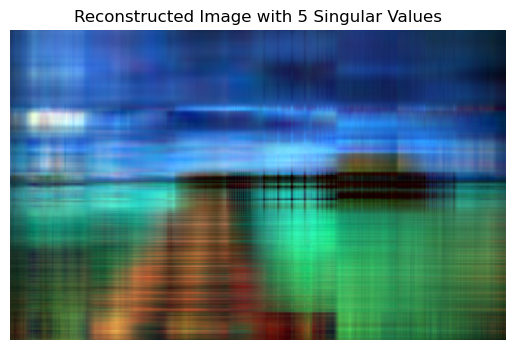

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


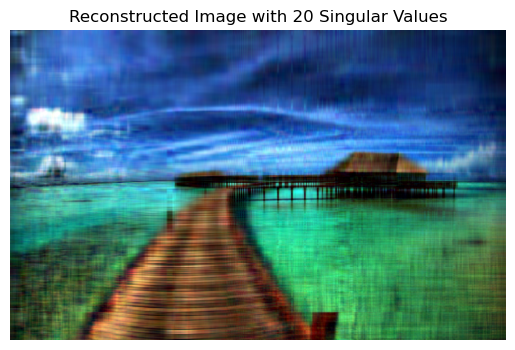

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


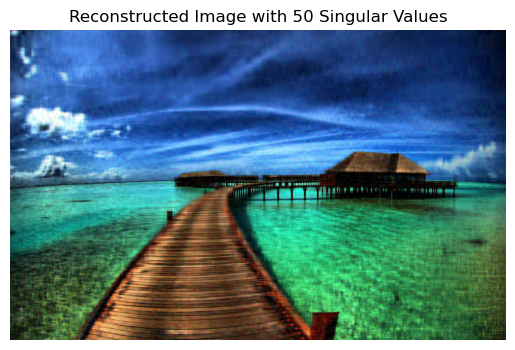

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


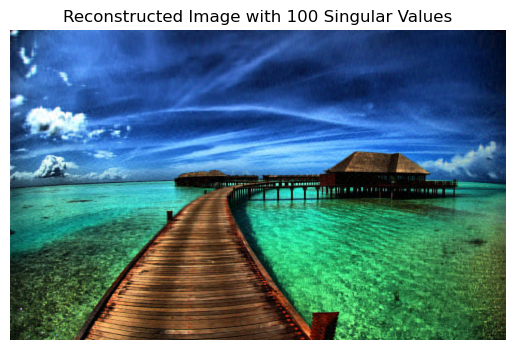

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


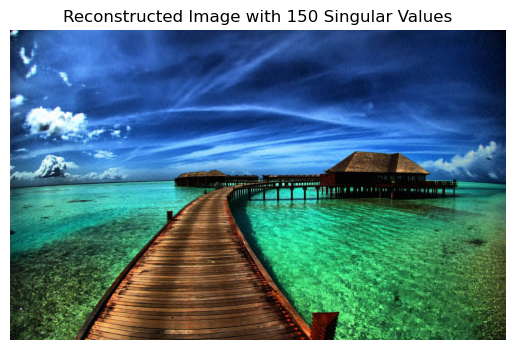

In [5]:
def svd_reconstruct(U, S, Vt, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

def reconstruct_image(U_R, S_R, Vt_R, U_G, S_G, Vt_G, U_B, S_B, Vt_B, k):
    R_reconstructed = svd_reconstruct(U_R, S_R, Vt_R, k)
    G_reconstructed = svd_reconstruct(U_G, S_G, Vt_G, k)
    B_reconstructed = svd_reconstruct(U_B, S_B, Vt_B, k)
    return np.stack([R_reconstructed, G_reconstructed, B_reconstructed], axis=2)

k_values = [5, 20, 50, 100, 150]
for k in k_values:
    reconstructed_image = reconstruct_image(U_R, S_R, Vt_R, U_G, S_G, Vt_G, U_B, S_B, Vt_B, k)
    plt.imshow(reconstructed_image)
    plt.title(f"Reconstructed Image with {k} Singular Values")
    plt.axis('off')
    plt.show()

**step 4)**
Calculate the Reconstruction Error and Compression Ratio

In [6]:
def calculate_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed)

def calculate_compression_ratio(original_shape, k):
    return (k * (1 + sum(original_shape))) / np.prod(original_shape)

errors = []
compression_ratios = []
for k in k_values:
    reconstructed_image = reconstruct_image(U_R, S_R, Vt_R, U_G, S_G, Vt_G, U_B, S_B, Vt_B, k)
    error = calculate_error(image, reconstructed_image)
    compression_ratio = calculate_compression_ratio(image.shape, k)
    errors.append(error)
    compression_ratios.append(compression_ratio)
    print(f"For {k} singular values: Error = {error}, Compression Ratio = {compression_ratio}")

For 5 singular values: Error = 288.7966971261218, Compression Ratio = 0.002259837962962963
For 20 singular values: Error = 199.31827526220144, Compression Ratio = 0.009039351851851852
For 50 singular values: Error = 146.17753910075186, Compression Ratio = 0.022598379629629628
For 100 singular values: Error = 105.41739003364806, Compression Ratio = 0.045196759259259256
For 150 singular values: Error = 81.03532868895753, Compression Ratio = 0.06779513888888888


**step 5)**
Generate the Plots and Tables

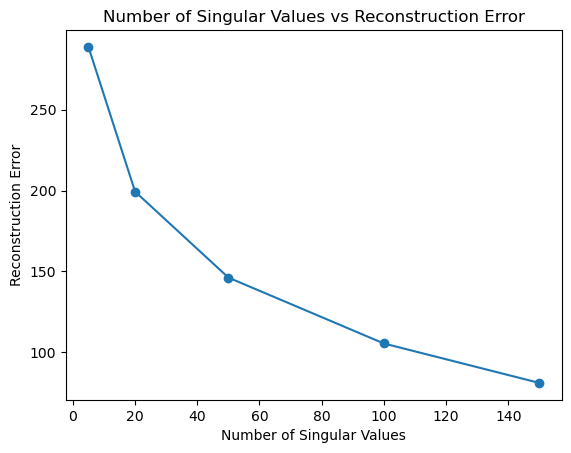

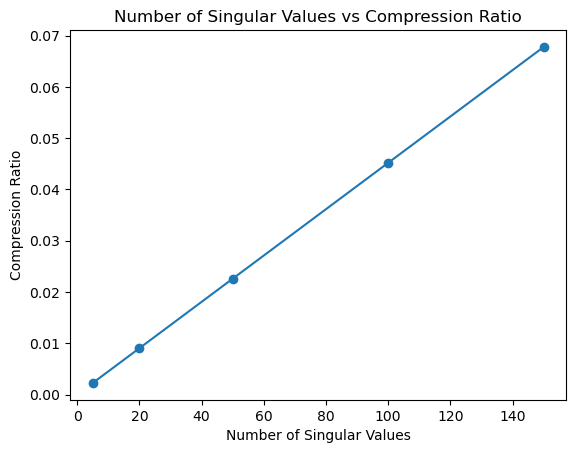

In [7]:
# Plot number of eigenvalues vs error
plt.plot(k_values, errors, marker='o')
plt.title("Number of Singular Values vs Reconstruction Error")
plt.xlabel("Number of Singular Values")
plt.ylabel("Reconstruction Error")
plt.show()

# Plot number of eigenvalues vs compression ratio
plt.plot(k_values, compression_ratios, marker='o')
plt.title("Number of Singular Values vs Compression Ratio")
plt.xlabel("Number of Singular Values")
plt.ylabel("Compression Ratio")
plt.show()